In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA

In [15]:
# Load the dataset
data = pd.read_csv('data.csv')

In [3]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
data = data.drop('id', axis=1)
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60      2019.0   
1         0.1812  ...          23.41           158.80      1956.0   
2         0.2069  ...          25.53           152.50      1709.0   
3         0.2597  ...          26.50            98.87       567.7   
4         0.1809  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  Unnamed: 32  
0          0.4601                  0.11890          NaN  
1          0.2750                  0.08902          NaN  
2          0.3613                  0.08758          NaN  
3          0.6638                  0.17300          NaN  
4          0.2364                  0.07678          NaN  

[5 rows x 32 columns]

In [5]:
data = data.drop('Unnamed: 32',axis=1)
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [6]:
# Variable types
variable_types = data.dtypes
variable_types

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [13]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
# Missing values
missing_values = data.isnull().sum()
missing_values

In [8]:
# Summary statistics
summary_statistics = data.describe()
summary_statistics

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [9]:
# Outlier Detection using IQR
Q1 = data.quantile(0.25, numeric_only=True)
Q3 = data.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
data_numeric = data.select_dtypes(include=[np.number])
outliers = ((data_numeric < (Q1 - 1.5 * IQR)) | (data_numeric > (Q3 + 1.5 * IQR))).sum()
outliers

radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64

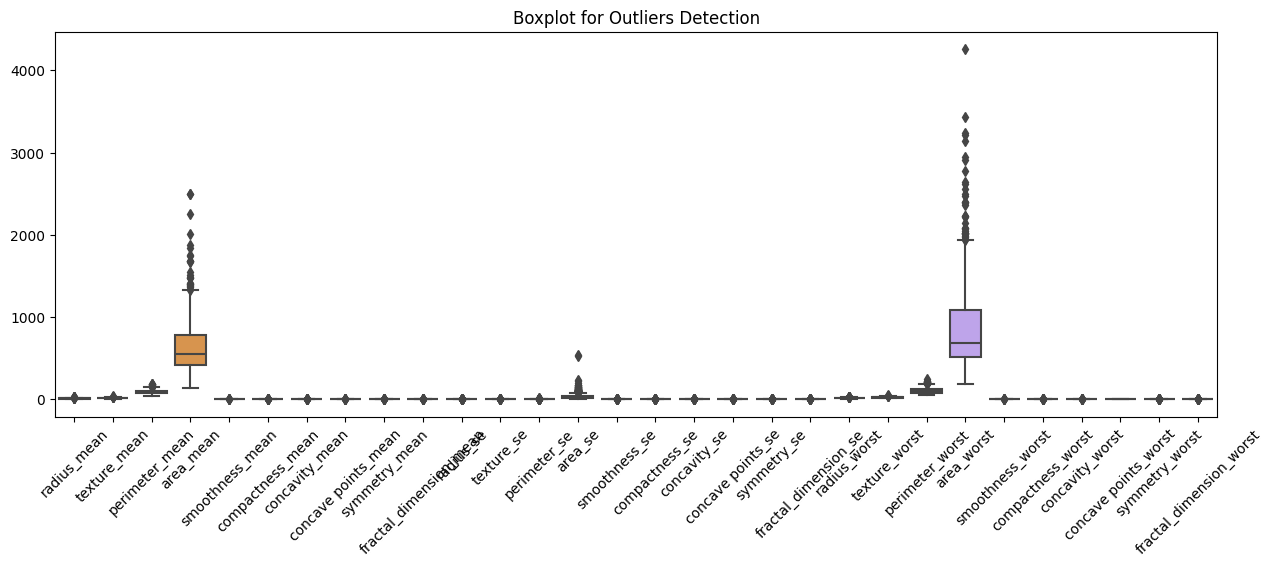

In [10]:
# Boxplots for outlier detection
plt.figure(figsize=(15, 5))
sns.boxplot(data)
plt.title('Boxplot for Outliers Detection')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Correlation matrix
correlation_matrix = data.corr(numeric_only=True)
correlation_matrix

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

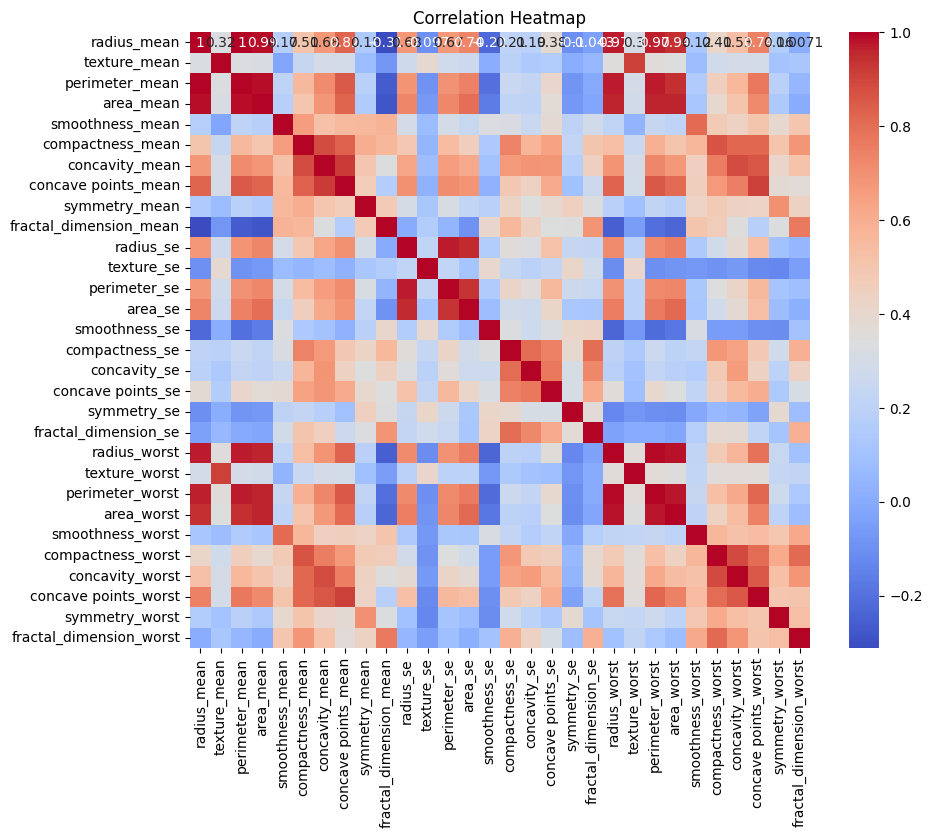

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [61]:
# Distribution of diagnosis
diagnosis_distribution = data['diagnosis'].value_counts()
diagnosis_distribution

diagnosis
B    357
M    212
Name: count, dtype: int64

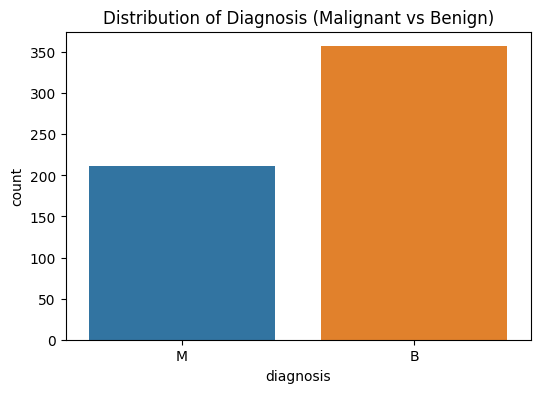

In [62]:
# Distribution of diagnosis
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='diagnosis')
plt.title('Distribution of Diagnosis (Malignant vs Benign)')
plt.show()

In [63]:
column_names = data.columns
column_names.tolist()

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [16]:
data.shape

(569, 33)

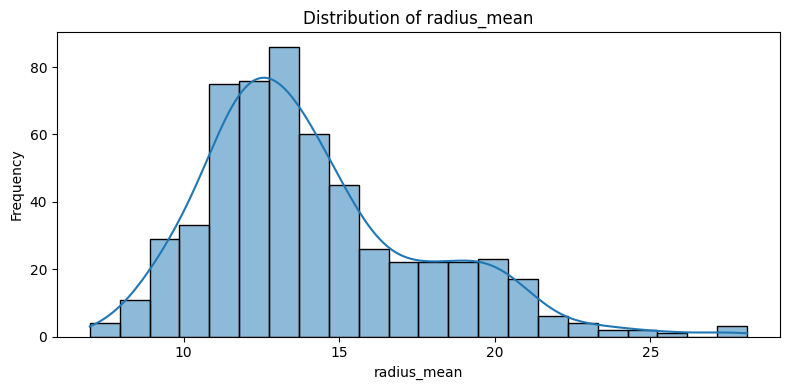

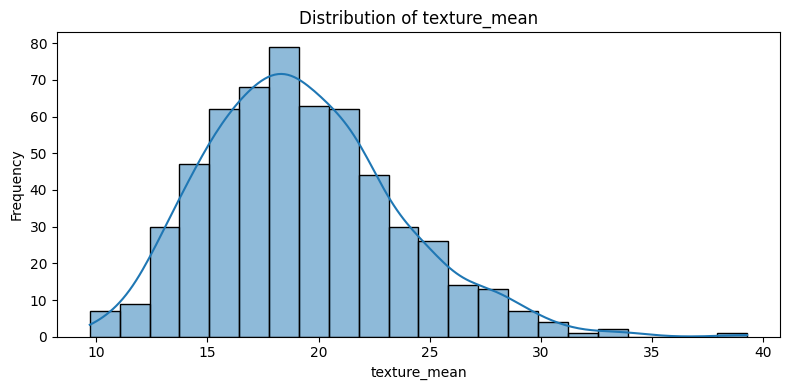

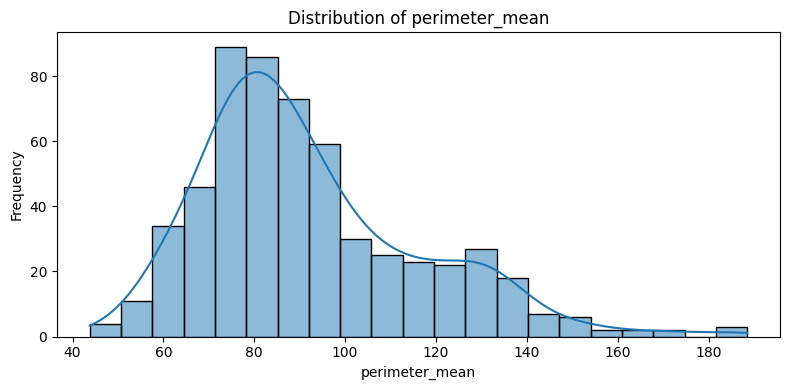

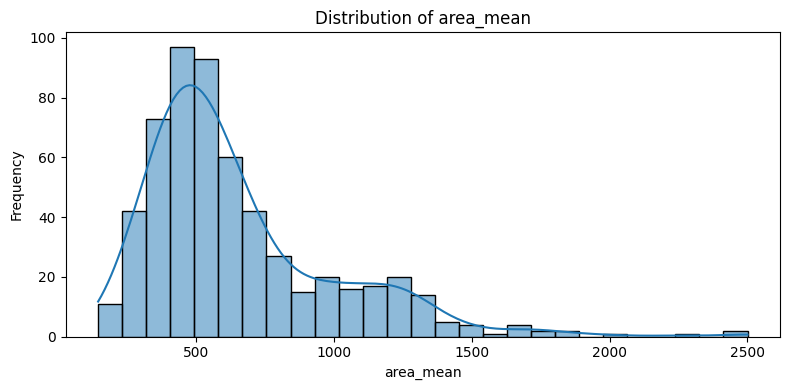

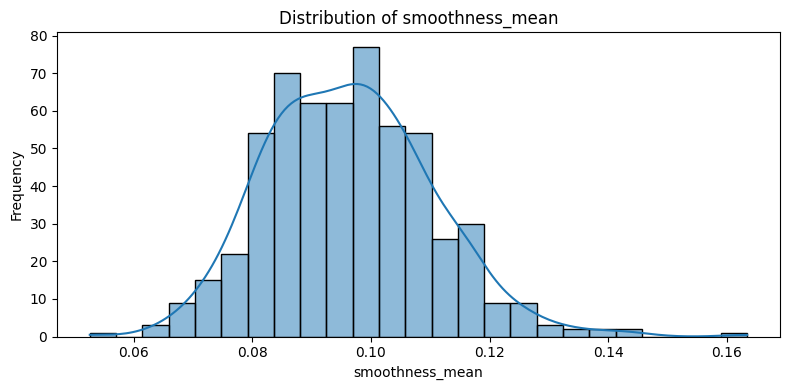

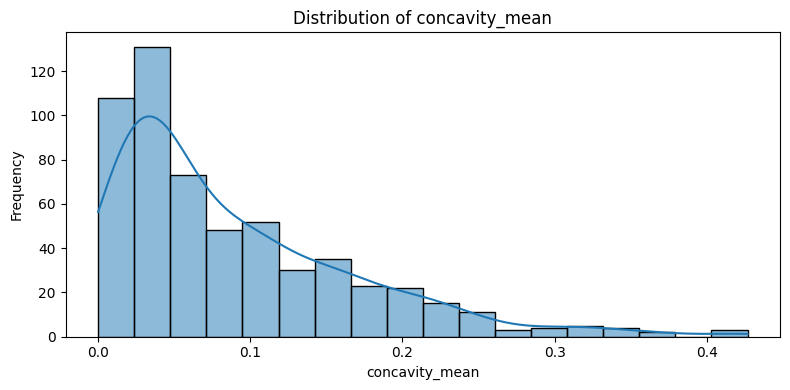

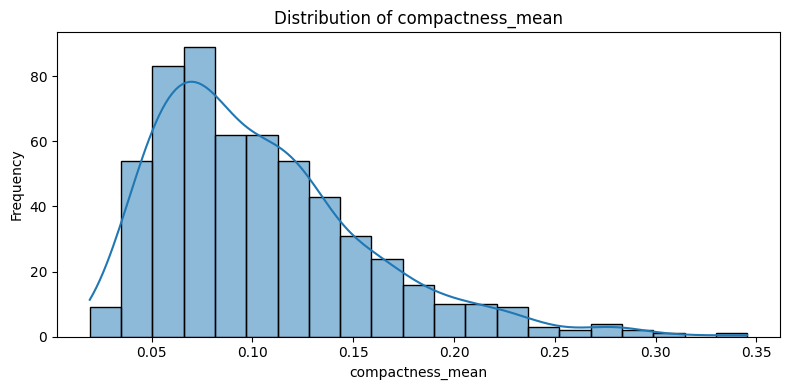

In [64]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean' , 'concavity_mean' , 'compactness_mean']

# Histograms for selected features
histograms = []
for feature in selected_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
plt.show()

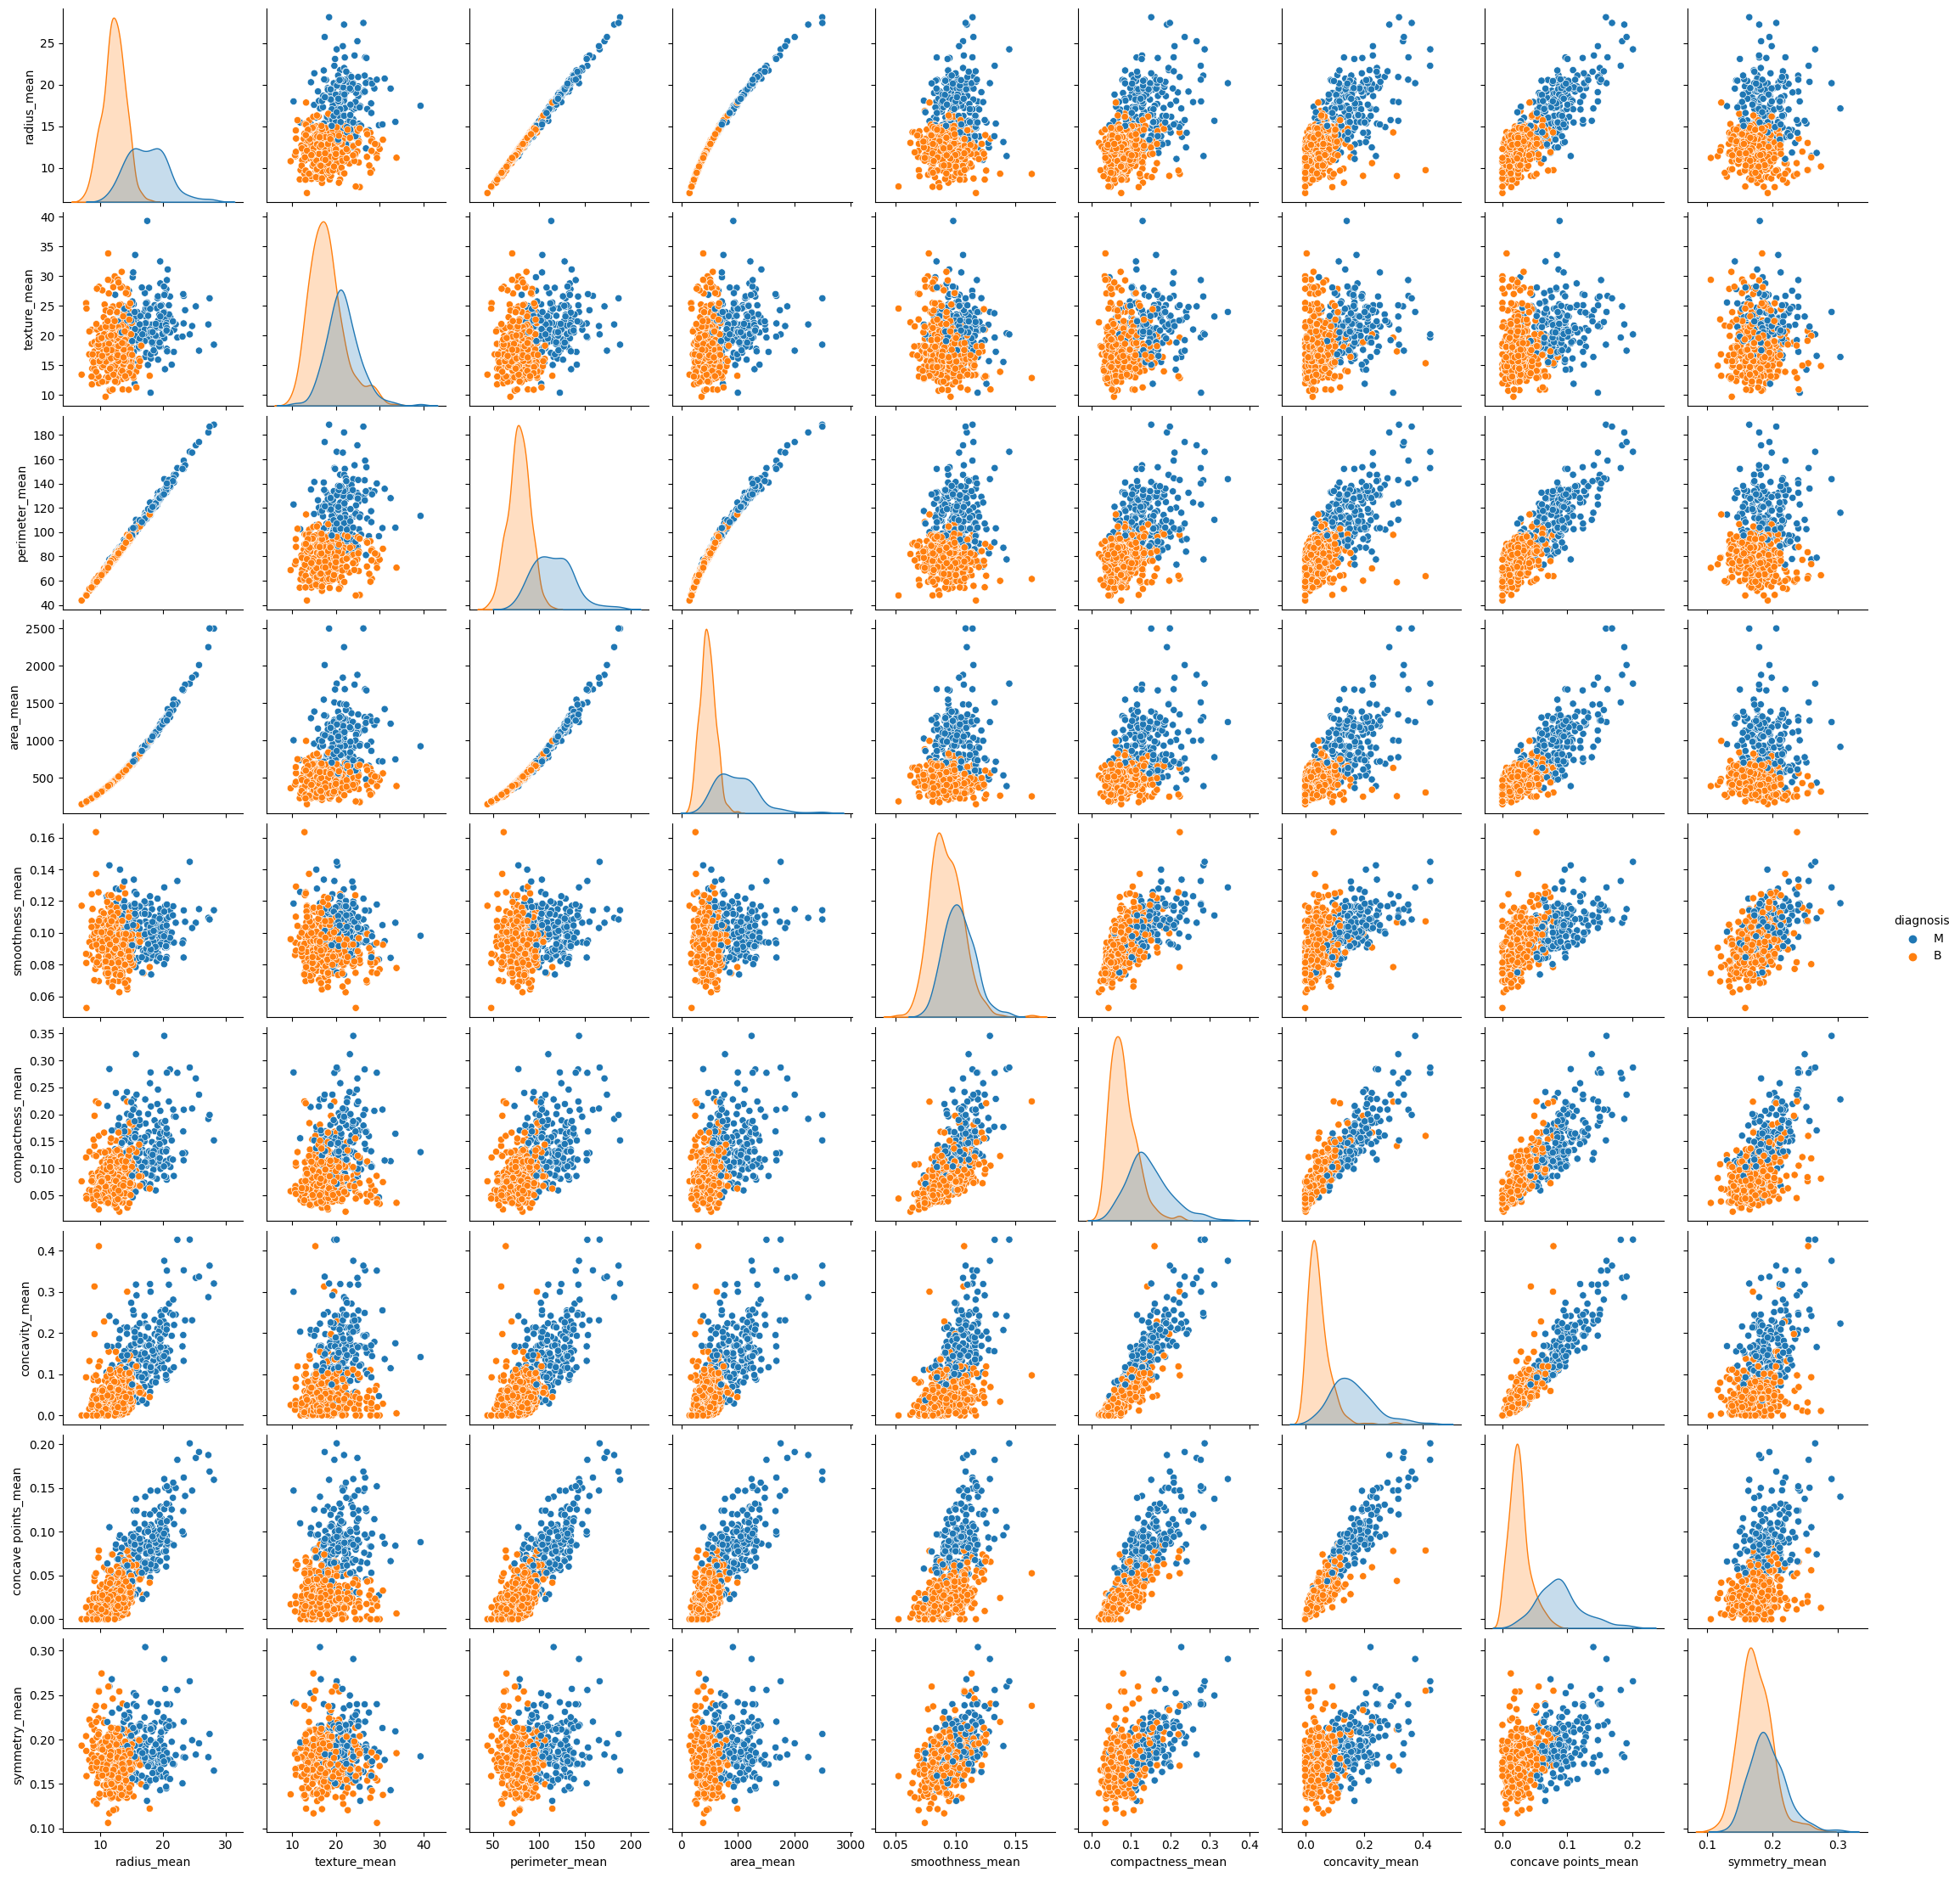

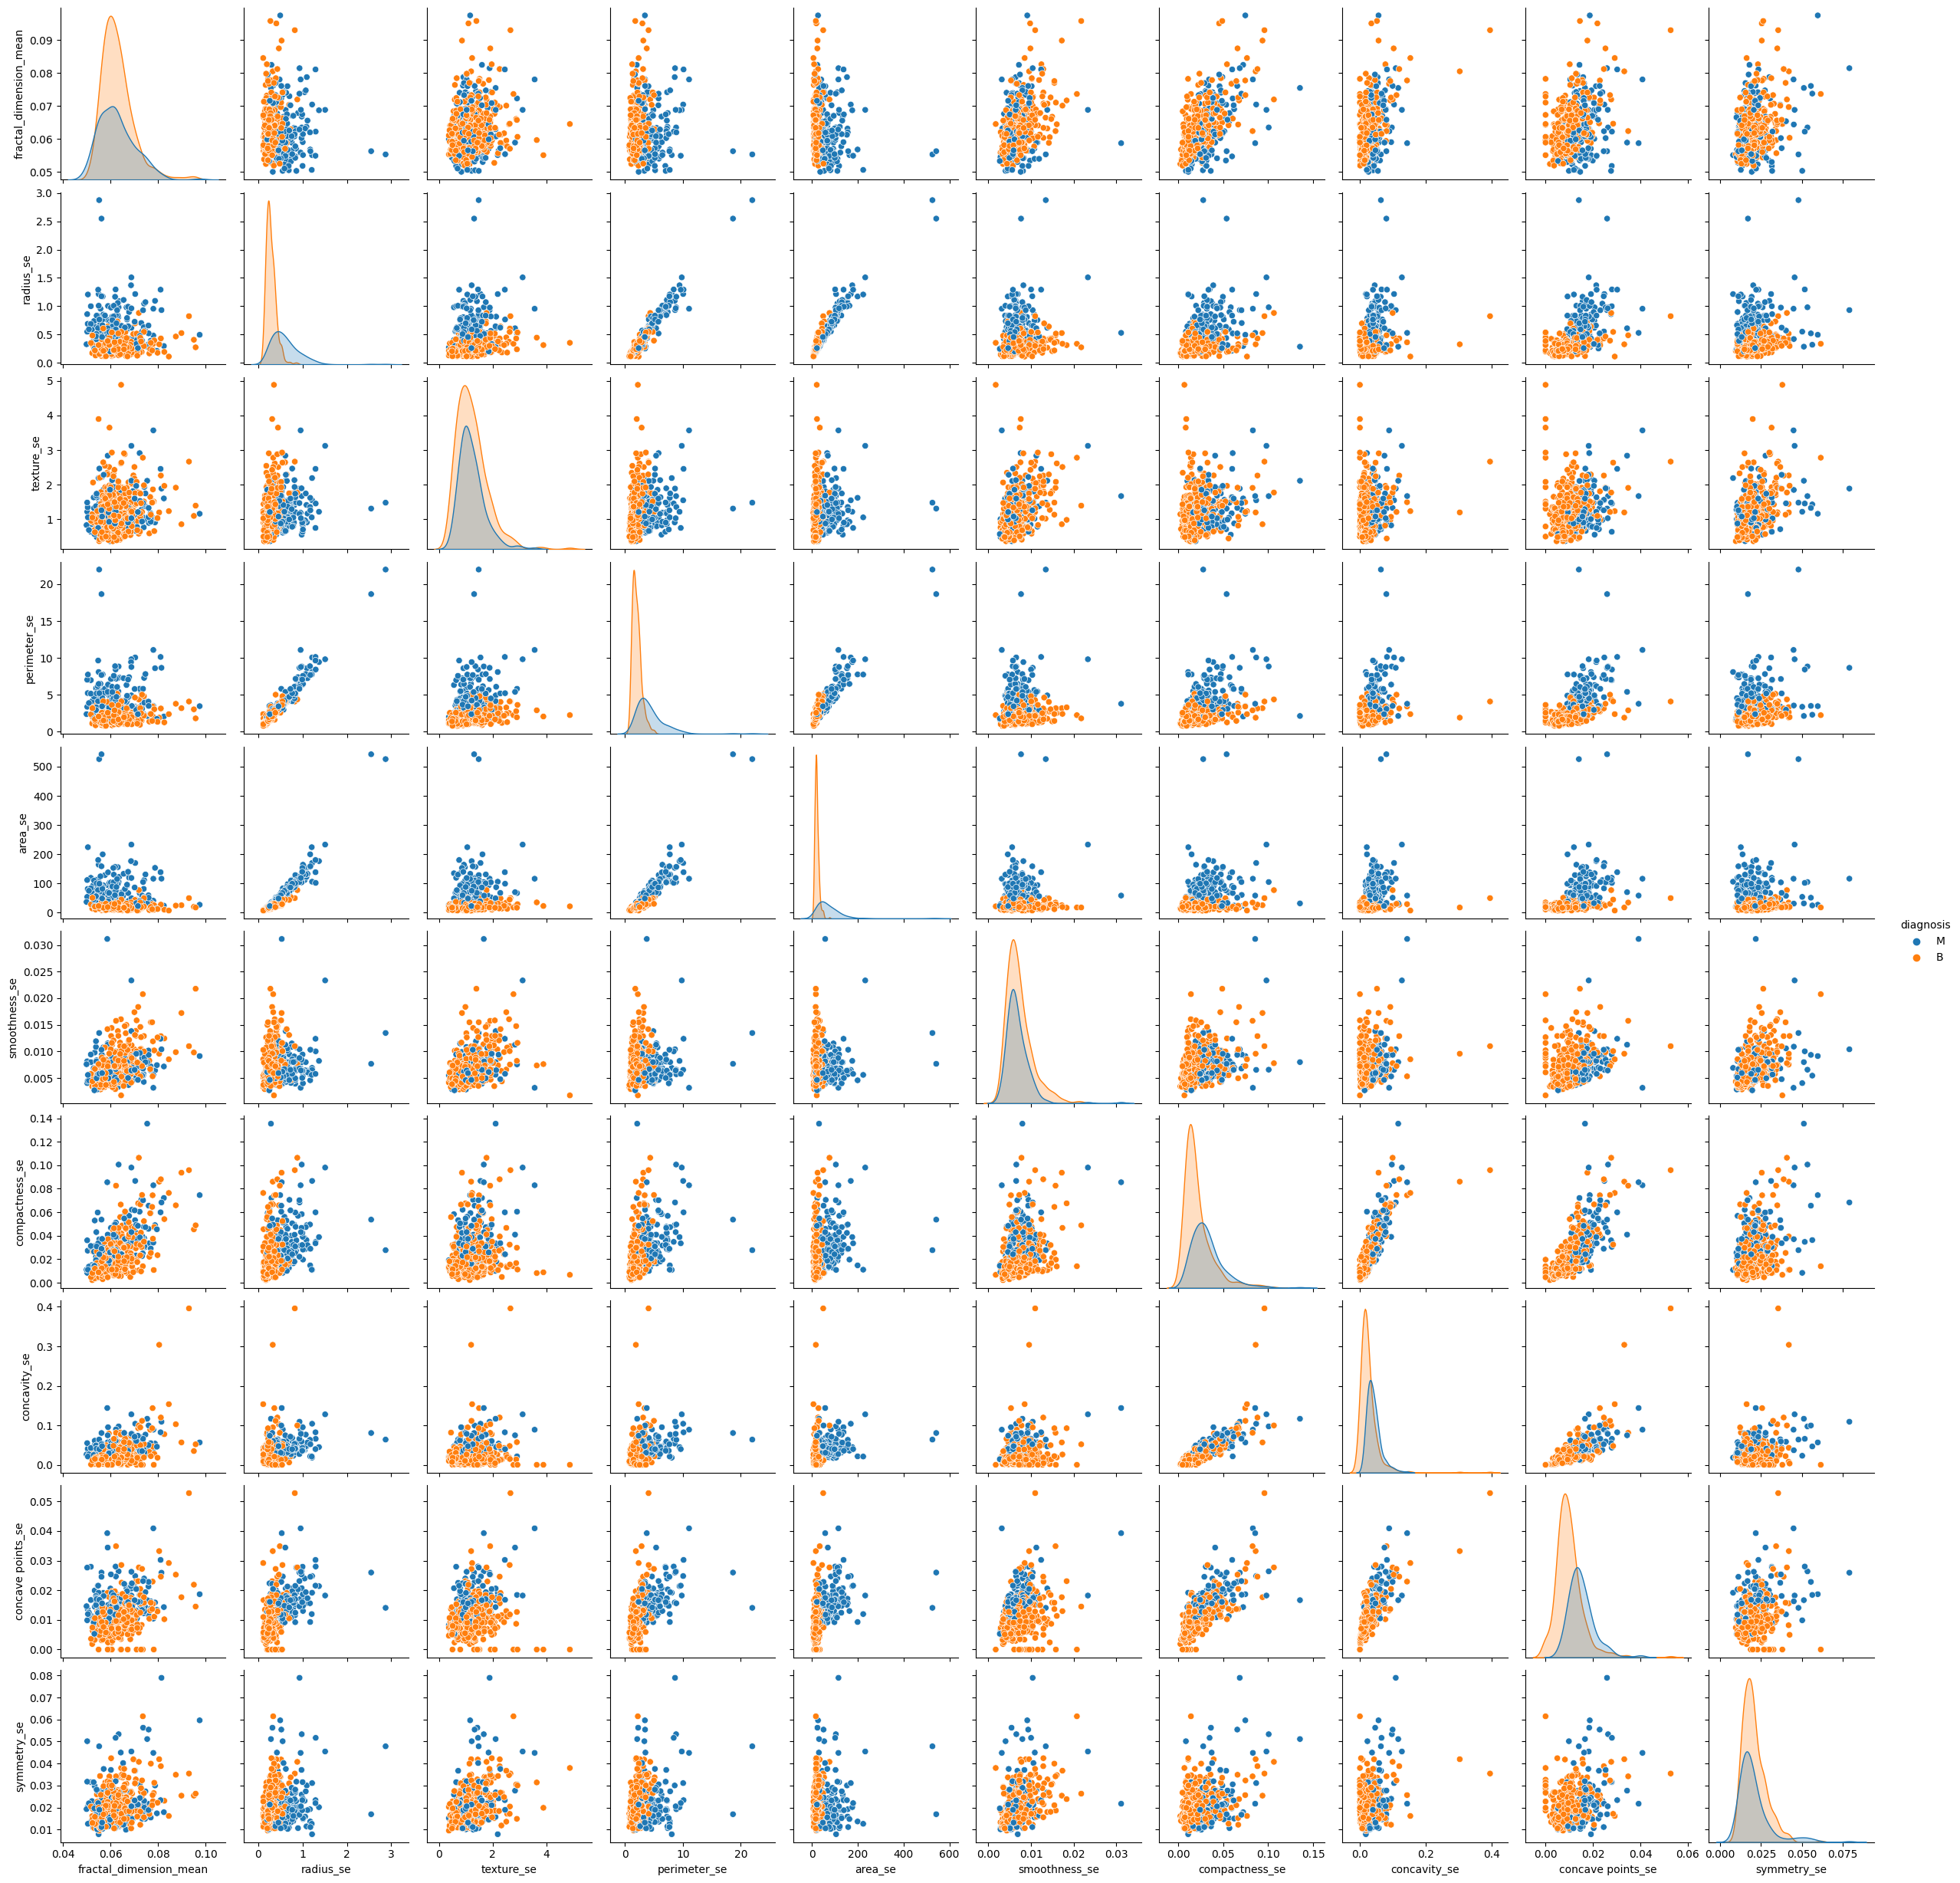

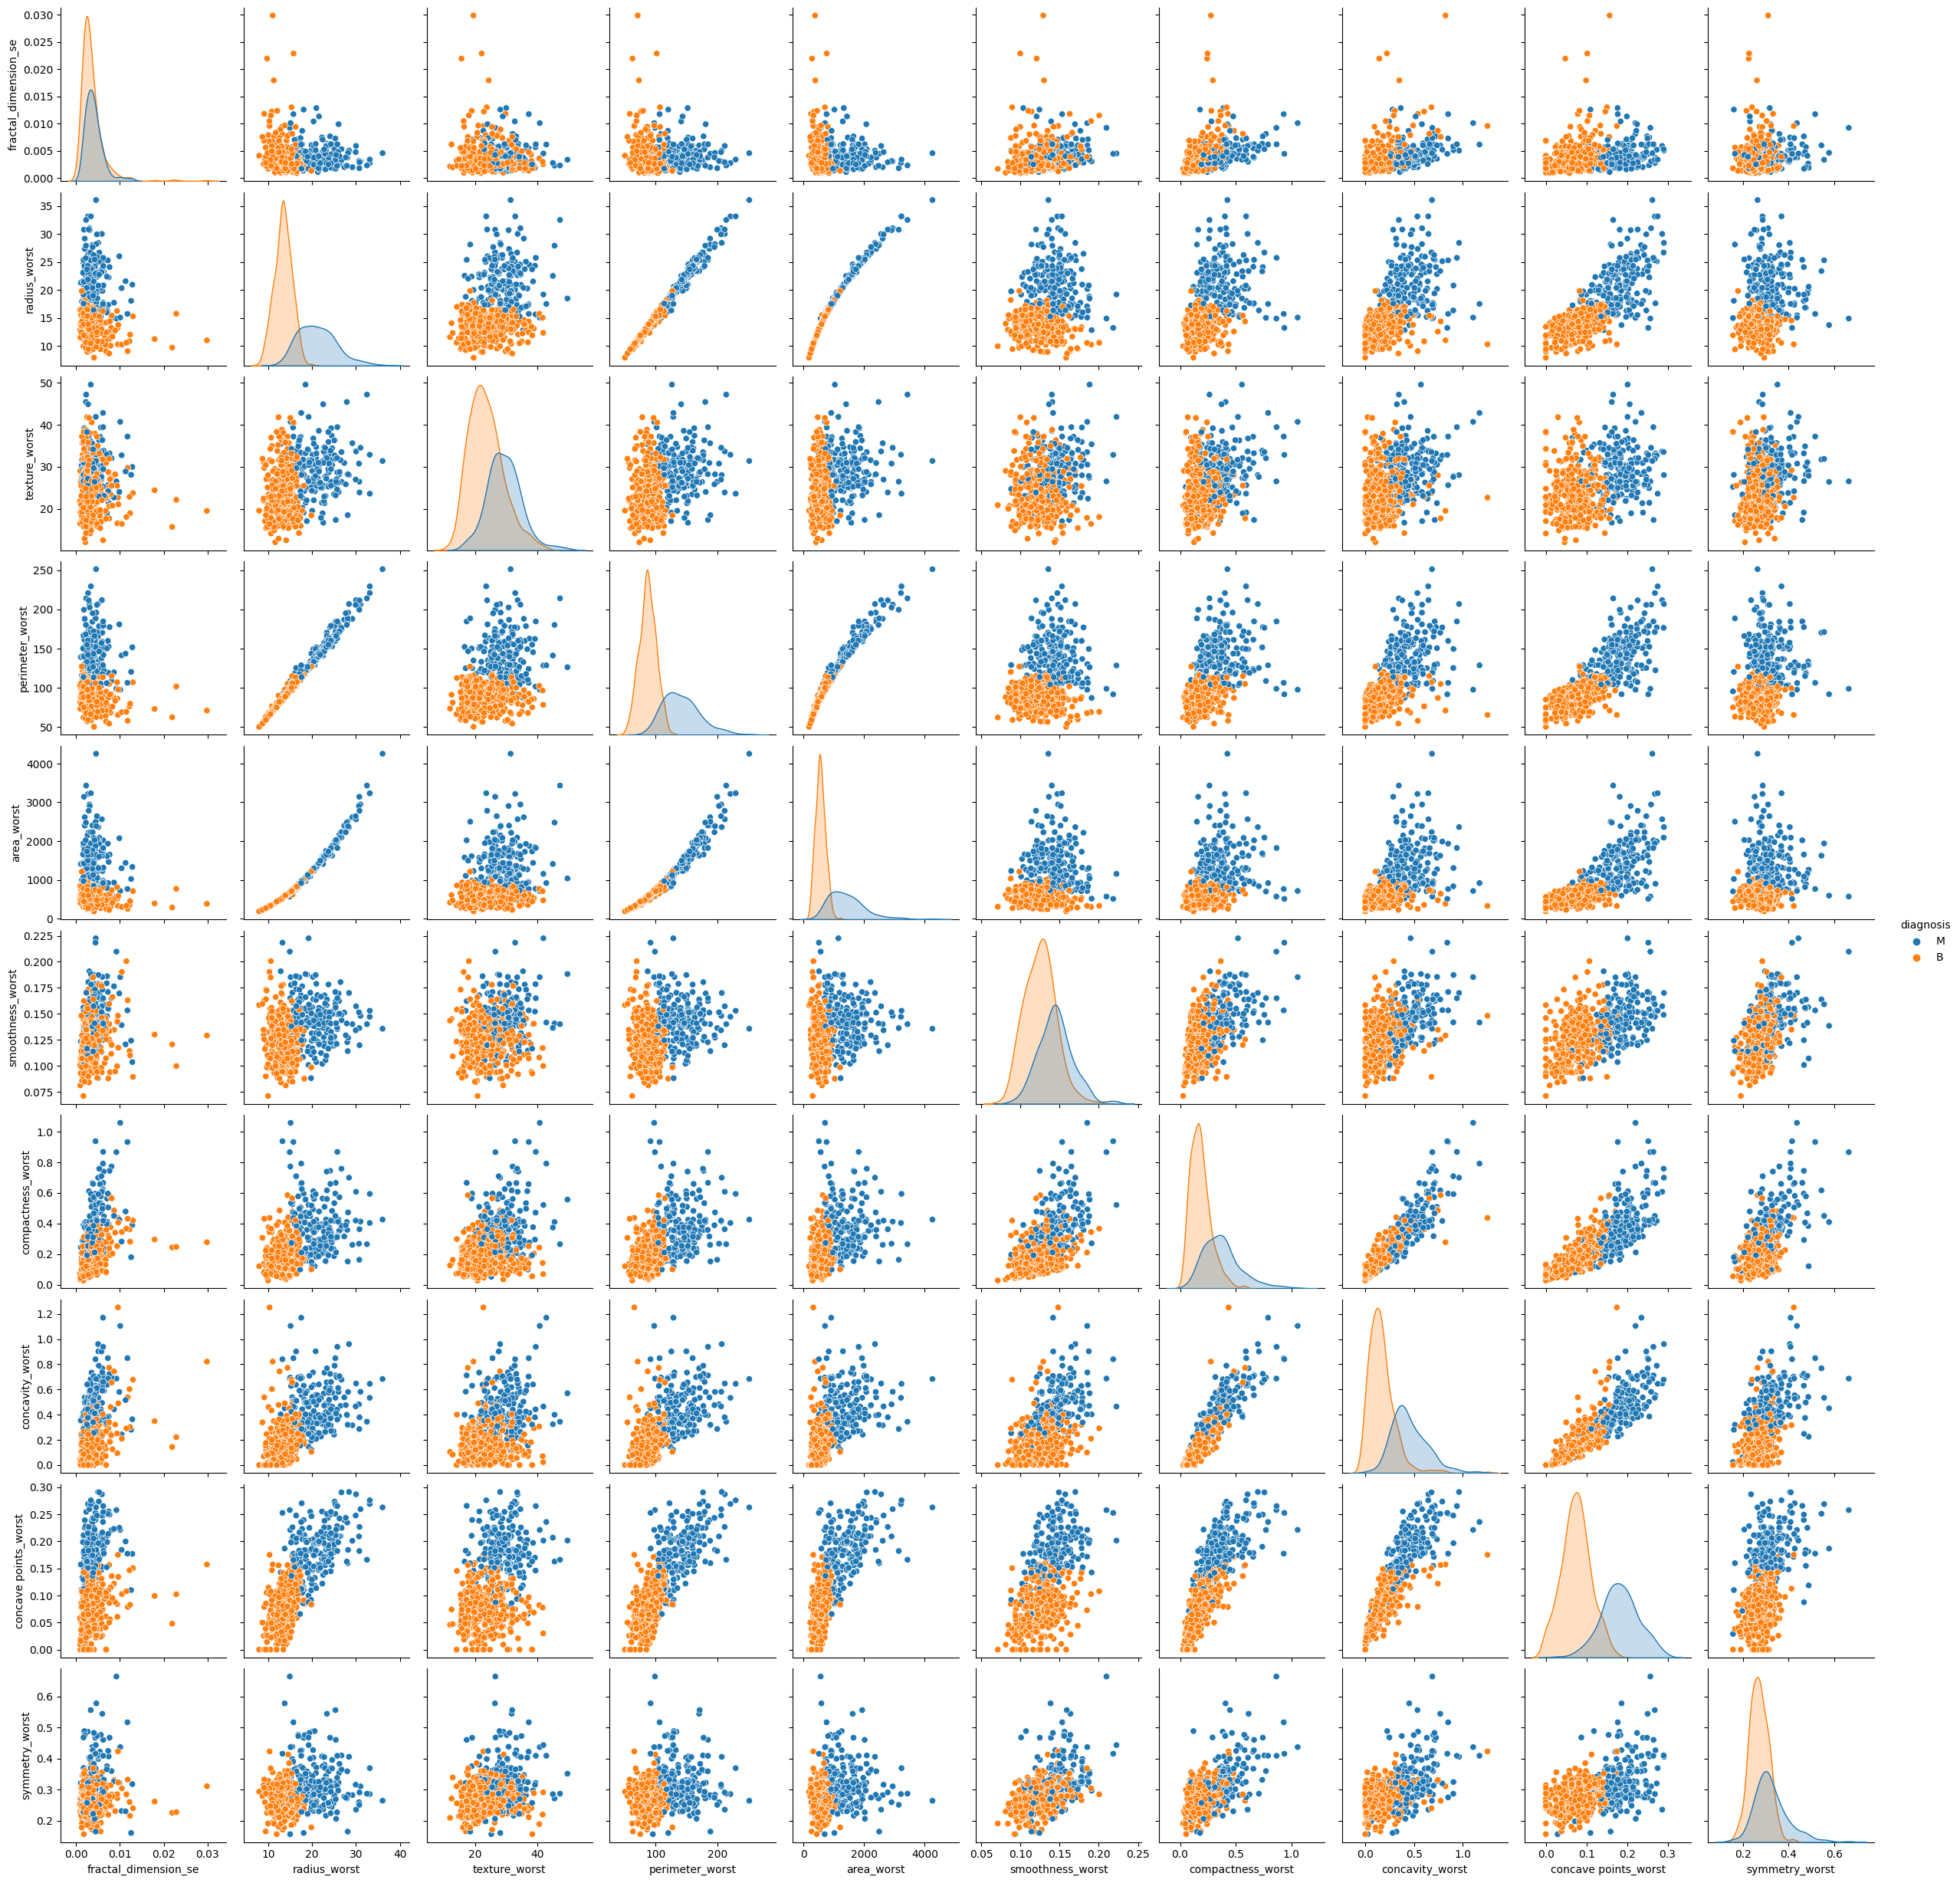

In [65]:
param_list = data.columns
num_subsets = 3
subset_size = len(param_list) // num_subsets

for i in range(num_subsets):
    start_index = i * subset_size
    end_index = (i + 1) * subset_size
    subset_columns = param_list[start_index:end_index].tolist() + ['diagnosis']
    numeric_columns = data[subset_columns].select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    sns.pairplot(data[numeric_columns + ['diagnosis']], hue="diagnosis")
    plt.show()

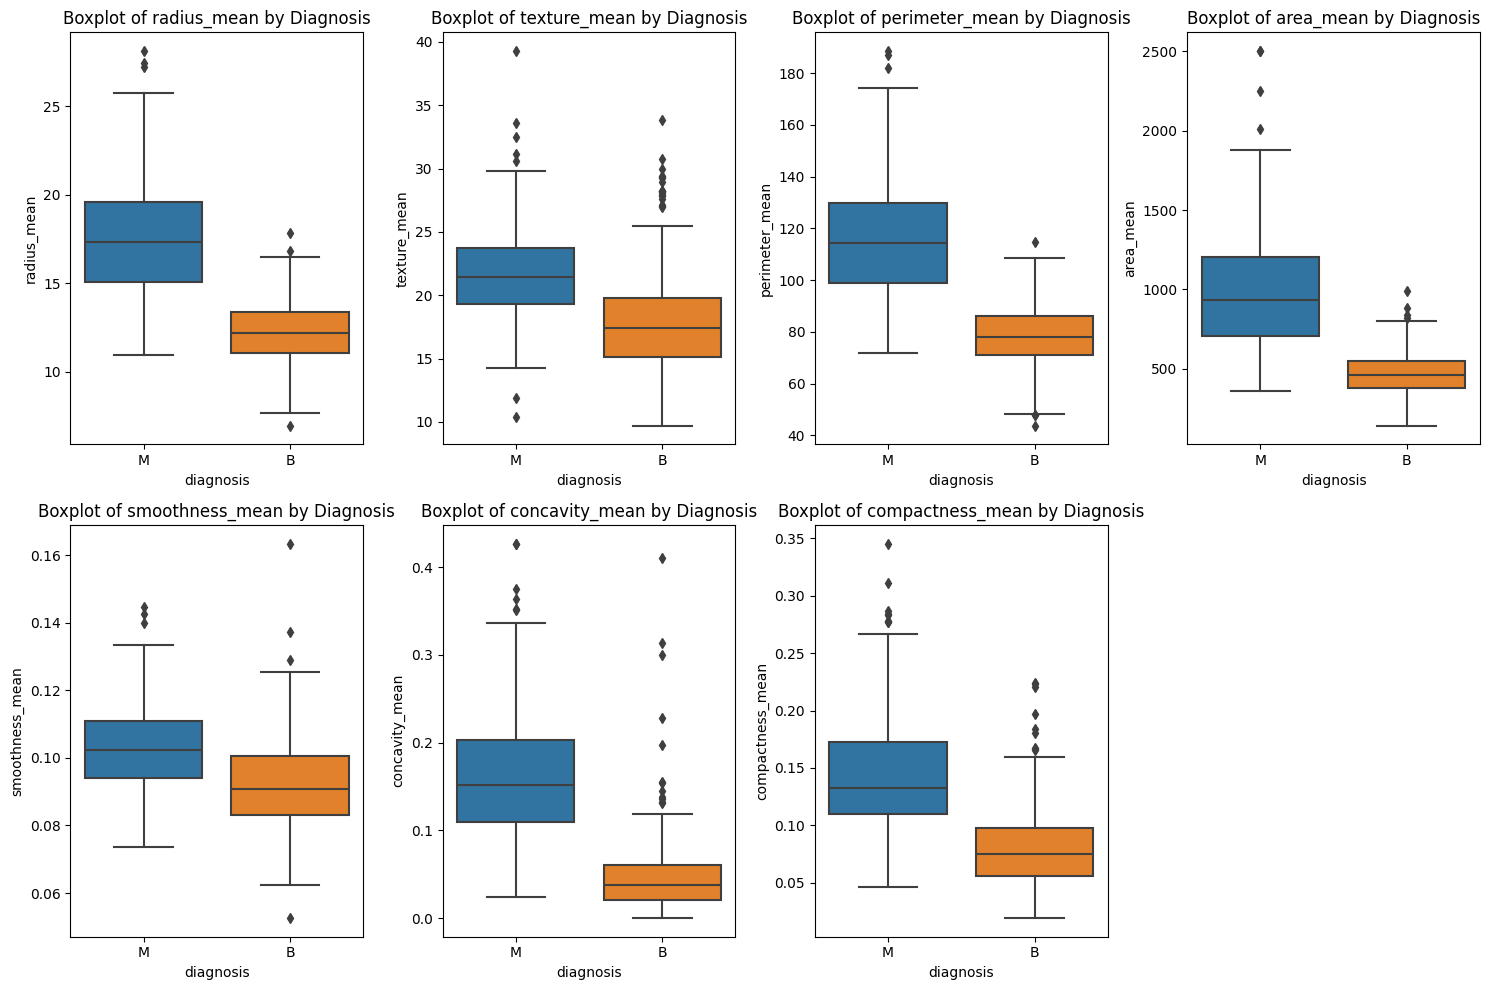

In [66]:
# Boxplots for selected features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x='diagnosis', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Diagnosis')
plt.tight_layout()
plt.show()

# Regression

In [72]:
# Encode categorical variables if necessary
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Assuming 'diagnosis' is your target variable
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
linear_reg = LinearRegression()
logistic_reg = LogisticRegression(max_iter=10000)
svr = SVR()

# Train models
linear_reg.fit(X_train_scaled, y_train)
logistic_reg.fit(X_train_scaled, y_train)
svr.fit(X_train_scaled, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test_scaled)
y_pred_logistic = logistic_reg.predict(X_test_scaled)
y_pred_svr = svr.predict(X_test_scaled)

# Compute errors
error_linear = mean_squared_error(y_test, y_pred_linear)
error_logistic = mean_squared_error(y_test, y_pred_logistic)
error_svr = mean_squared_error(y_test, y_pred_svr)

# Print errors
print(f'Linear Regression Error: {error_linear}')
print("------------------------------------------------------------------------------------------------\n")
print(f'Logistic Regression Error: {error_logistic}')
print("------------------------------------------------------------------------------------------------\n")
print(f"Support Vector Regression Mean Squared Error: {error_svr}")

Linear Regression Error: 0.06728376859363167
------------------------------------------------------------------------------------------------

Logistic Regression Error: 0.017543859649122806
------------------------------------------------------------------------------------------------

Support Vector Regression Mean Squared Error: 0.03565274485362755


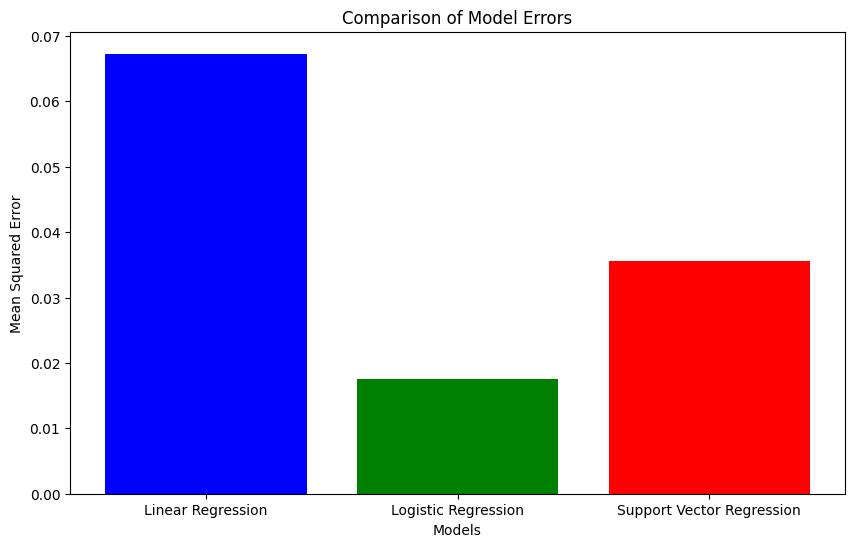

In [73]:
# Model names
models = ['Linear Regression', 'Logistic Regression' ,'Support Vector Regression']

# Corresponding errors
errors = [error_linear, error_logistic, error_svr]

# Creating bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, errors, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Model Errors')
plt.show()

# Classification

In [74]:
# If your target variable is categorical, encode it
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Split data into features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
knn = KNeighborsClassifier(n_neighbors=3)
svm = SVC()
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()
gaussian_nb = GaussianNB()
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train classifiers
knn.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)
decision_tree.fit(X_train_scaled, y_train)
gaussian_nb.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)
y_pred_forest = random_forest.predict(X_test_scaled)
y_pred_tree = decision_tree.predict(X_test_scaled)
y_pred_gaussian_nb = gaussian_nb.predict(X_test_scaled)
y_pred_mlp = mlp.predict(X_test_scaled)

#Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_gaussian_nb = accuracy_score(y_test, y_pred_gaussian_nb)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

# Compute and print accuracy and other metrics
print("K-Nearest Neighbours Performance:")
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_knn}\n")
print("------------------------------------------------------------------------------------------------\n")

print("Support Vector Machine Performance:")
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_svm}\n")
print("------------------------------------------------------------------------------------------------\n")

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_forest))
print(f"Accuracy: {accuracy_forest}\n")
print("------------------------------------------------------------------------------------------------\n")

print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_tree))
print(f"Accuracy: {accuracy_tree}\n")
print("------------------------------------------------------------------------------------------------\n")

print("Gaussian Naive Bayes Performance:")
print(classification_report(y_test, y_pred_gaussian_nb))
print(f"Accuracy: {accuracy_gaussian_nb}\n")
print("------------------------------------------------------------------------------------------------\n")

print("Neural Network (MLP) Performance:")
print(classification_report(y_test, y_pred_mlp))
print(f"Accuracy: {accuracy_mlp}\n")
print("------------------------------------------------------------------------------------------------\n")

K-Nearest Neighbours Performance:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy: 0.9590643274853801

------------------------------------------------------------------------------------------------

Support Vector Machine Performance:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Accuracy: 0.9766081871345029

------------------------------------------------------------------------------------------------

Random Forest Perfor

# Hyper Parameter Testing

In [75]:
# Initialize Logistic Regression model
logistic_reg = LogisticRegression(max_iter=10000)

# Create a parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['newton-cg', 'lbfgs', 'liblinear']  # Algorithm to use for optimization
}

# Initialize Grid Search for Logistic Regression
grid_search_lr = GridSearchCV(estimator=logistic_reg, param_grid=param_grid_lr, cv=5, verbose=1, scoring='accuracy')

# Fit the grid search to the data
grid_search_lr.fit(X_train_scaled, y_train)

# Print best parameters and best score for Logistic Regression
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best Score for Logistic Regression:", grid_search_lr.best_score_ ,'\n')
print("------------------------------------------------------------------------------------------------\n")

# Initialize SVR model
svr = SVR()

# Create a parameter grid for SVR
param_grid_svr = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Type of kernel
}

# Initialize Grid Search for SVR
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=5, verbose=1, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search_svr.fit(X_train_scaled, y_train)

# Print best parameters and best score for SVR
print("Best Parameters for SVR:", grid_search_svr.best_params_)
print("Best Score for SVR:", grid_search_svr.best_score_ ,'\n')
print("------------------------------------------------------------------------------------------------\n")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best Score for Logistic Regression: 0.977373417721519 

------------------------------------------------------------------------------------------------

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for SVR: {'C': 1, 'kernel': 'rbf'}
Best Score for SVR: -0.04005475666328584 

------------------------------------------------------------------------------------------------



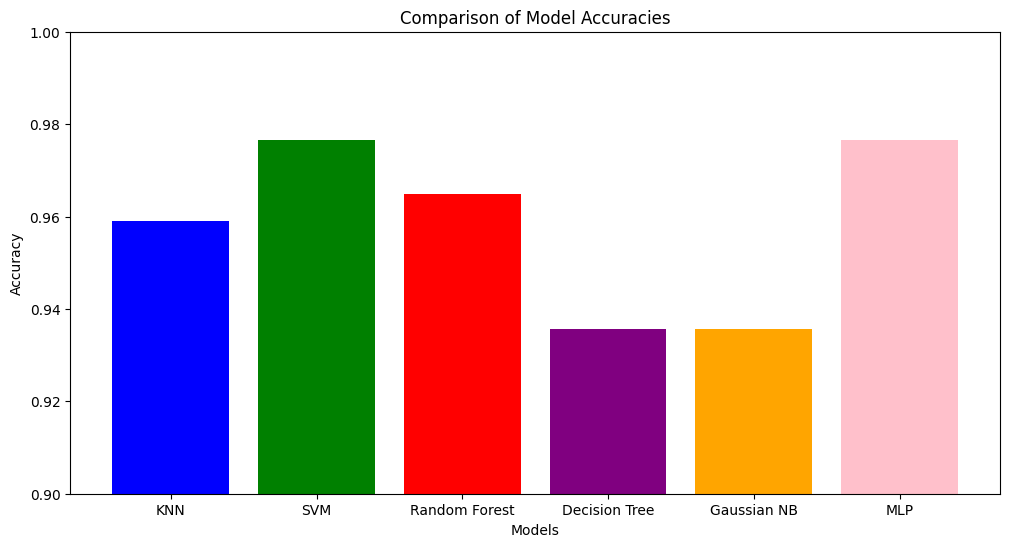

In [76]:
# Model names
models = ['KNN', 'SVM', 'Random Forest', 'Decision Tree', 'Gaussian NB', 'MLP']

# Corresponding accuracies
accuracies = [accuracy_knn, accuracy_svm, accuracy_forest, accuracy_tree, accuracy_gaussian_nb, accuracy_mlp]

# Creating bar chart
plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'pink'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.9, 1)  # Set y-axis limits for better comparison
plt.show()

# Hyperparameter Tuning

In [77]:
# Define parameter grid for KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}

# Initialize Grid Search with Cross-Validation
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')

# Fit the grid search model
grid_knn.fit(X_train_scaled, y_train)

# Get best parameters and score
best_params_knn = grid_knn.best_params_
best_score_knn = grid_knn.best_score_

print("Best Parameters for KNN:", best_params_knn)
print("Best Score for KNN:", best_score_knn ,'\n')
print("------------------------------------------------------------------------------------------------\n")

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100], 
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize Grid Search with Cross-Validation
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')

# Fit the grid search model
grid_svm.fit(X_train_scaled, y_train)

# Get best parameters and score
print("Best Parameters for SVM:", grid_svm.best_params_)
print("Best Score for SVM:", grid_svm.best_score_ ,'\n')
print("------------------------------------------------------------------------------------------------\n")


# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Initialize Grid Search with Cross-Validation
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')

# Fit the grid search model
grid_rf.fit(X_train_scaled, y_train)

# Get best parameters and score
print("Best Parameters for Random Forest:", grid_rf.best_params_)
print("Best Score for Random Forest:", grid_rf.best_score_ ,'\n')
print("------------------------------------------------------------------------------------------------\n")


# Define parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Grid Search with Cross-Validation
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')

# Fit the grid search model
grid_dt.fit(X_train_scaled, y_train)

# Get best parameters and score
print("Best Parameters for Decision Tree:", grid_dt.best_params_)
print("Best Score for Decision Tree:", grid_dt.best_score_ ,'\n')
print("------------------------------------------------------------------------------------------------\n")


# Define parameter grid for GaussianNB
param_grid_gnb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

# Initialize Grid Search with Cross-Validation
grid_gnb = GridSearchCV(GaussianNB(), param_grid_gnb, cv=5, scoring='accuracy')

# Fit the grid search model
grid_gnb.fit(X_train_scaled, y_train)

# Get best parameters and score
print("Best Parameters for Gaussian Naive Bayes:", grid_gnb.best_params_)
print("Best Score for Gaussian Naive Bayes:", grid_gnb.best_score_ ,'\n')
print("------------------------------------------------------------------------------------------------\n")


# Define parameter grid for MLP
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Initialize Grid Search with Cross-Validation
grid_mlp = GridSearchCV(MLPClassifier(max_iter=1000), param_grid_mlp, cv=5, scoring='accuracy')

# Fit the grid search model
grid_mlp.fit(X_train_scaled, y_train)

# Get best parameters and score
print("Best Parameters for MLP:", grid_mlp.best_params_)
print("Best Score for MLP:", grid_mlp.best_score_ ,'\n')
print("------------------------------------------------------------------------------------------------\n")

Best Parameters for KNN: {'n_neighbors': 3}
Best Score for KNN: 0.9597784810126582 

------------------------------------------------------------------------------------------------

Best Parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Best Score for SVM: 0.9748417721518987 

------------------------------------------------------------------------------------------------

Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Best Score for Random Forest: 0.9623101265822784 

------------------------------------------------------------------------------------------------

Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}
Best Score for Decision Tree: 0.9246202531645571 

------------------------------------------------------------------------------------------------

Best Parameters for Gaussian Naive Bayes: {'var_smoothing': 1e-09}
Best Score for Gaussian Naive Bayes: 0.9321835443037975 

----------------------------------------------

In [79]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.title('Decision Tree')
plt.show()

NameError: name 'plt_tree' is not defined

<Figure size 2000x1000 with 0 Axes>

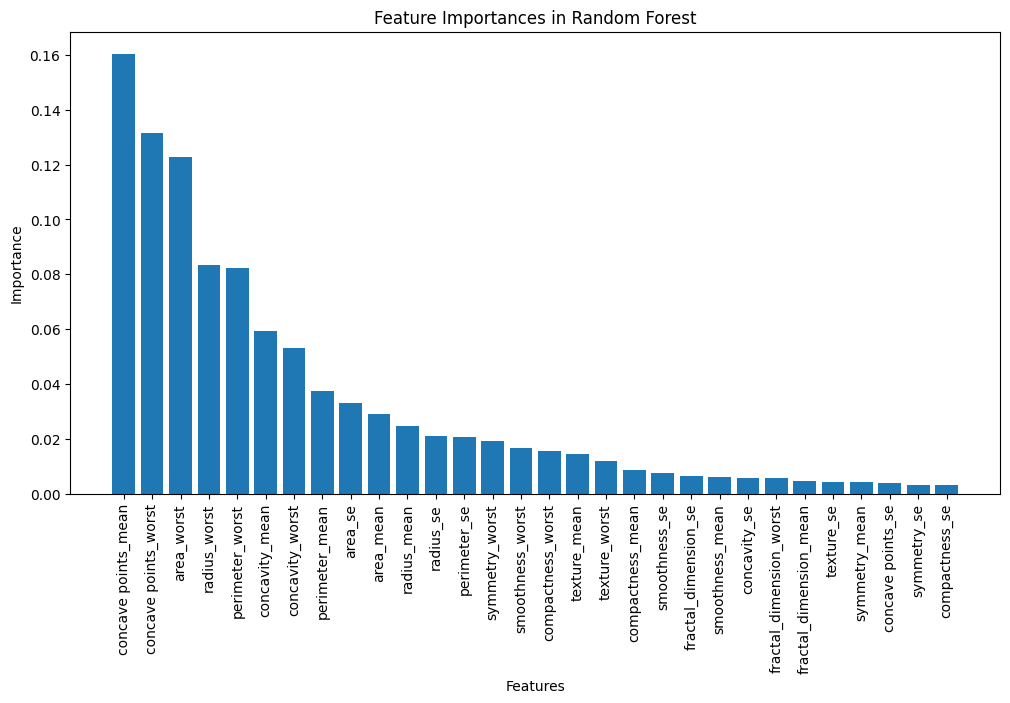

In [80]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances in Random Forest')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [81]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


def plot_predictions(model, X_test_pca, title):
    y_pred = model.predict(X_test_scaled)
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.5)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar()
    plt.show()

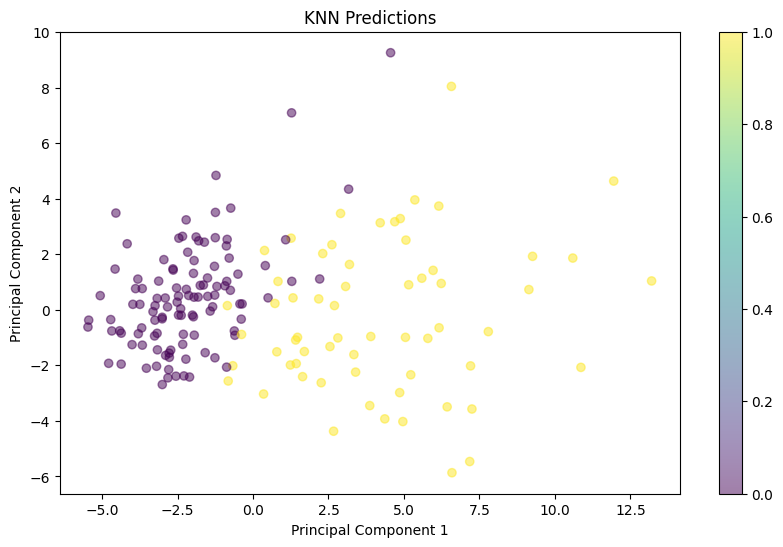

In [82]:
plot_predictions(knn, X_test_pca, 'KNN Predictions')

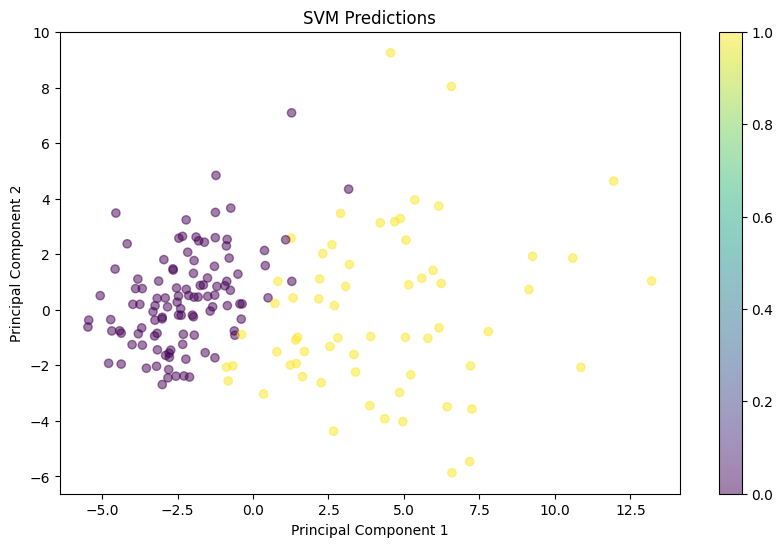

In [83]:
plot_predictions(svm, X_test_pca, 'SVM Predictions')

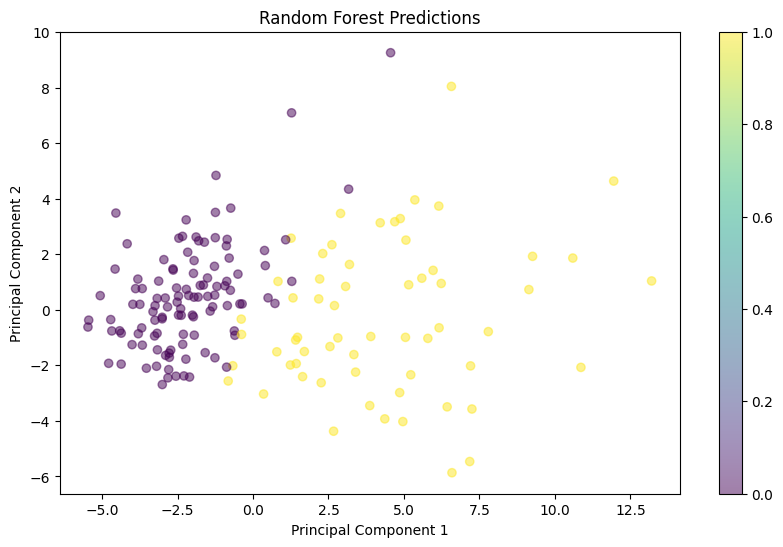

In [84]:
plot_predictions(random_forest, X_test_pca, 'Random Forest Predictions')

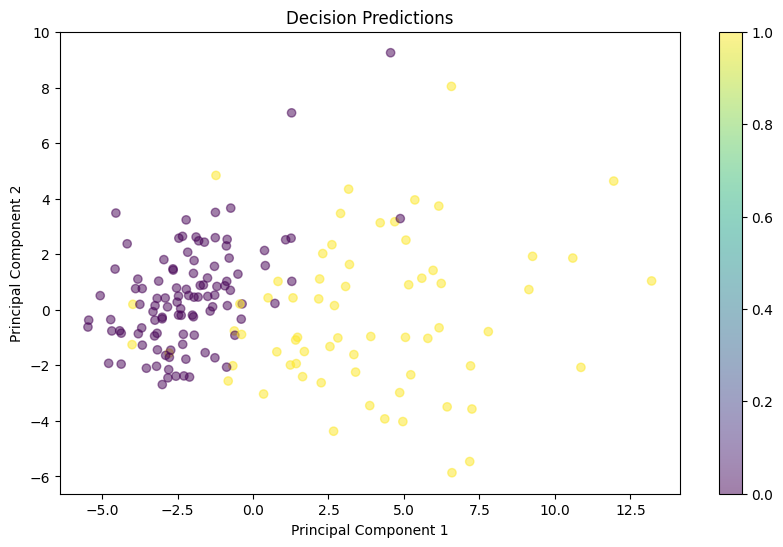

In [85]:
plot_predictions(decision_tree, X_test_pca, 'Decision Predictions')

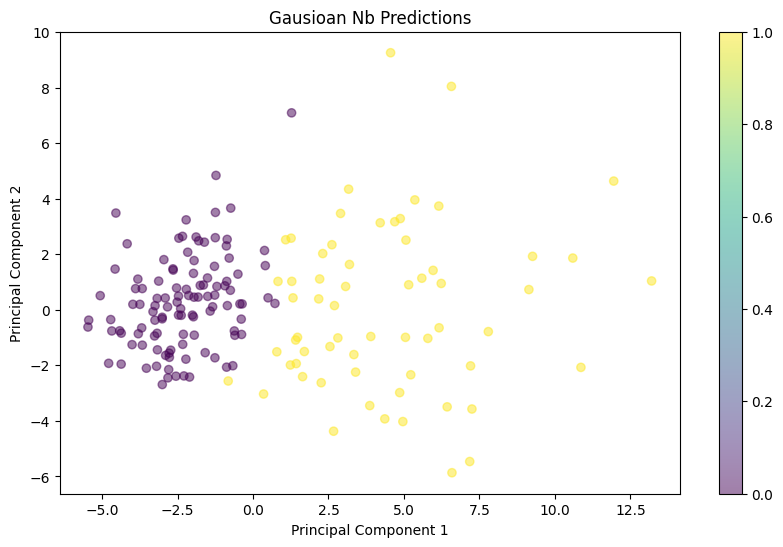

In [86]:
plot_predictions(gaussian_nb, X_test_pca, 'Gausioan Nb Predictions')

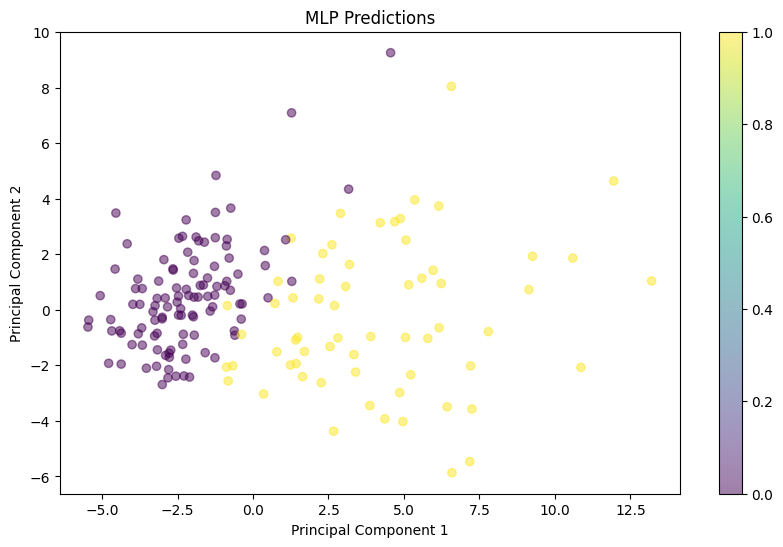

In [87]:
plot_predictions(mlp, X_test_pca, 'MLP Predictions')

In [88]:
# Function to plot confusion matrix
def plot_confusion_matrix(model, y_test, title):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

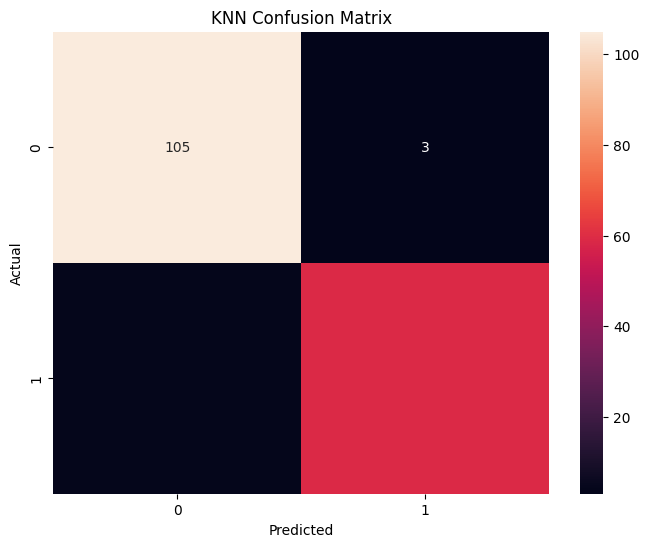

In [89]:
plot_confusion_matrix(knn, y_test, 'KNN Confusion Matrix')

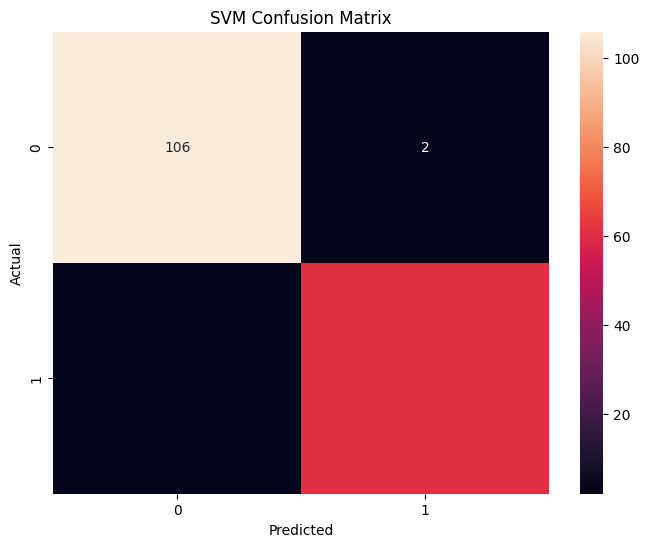

In [90]:
plot_confusion_matrix(svm,y_test, 'SVM Confusion Matrix')

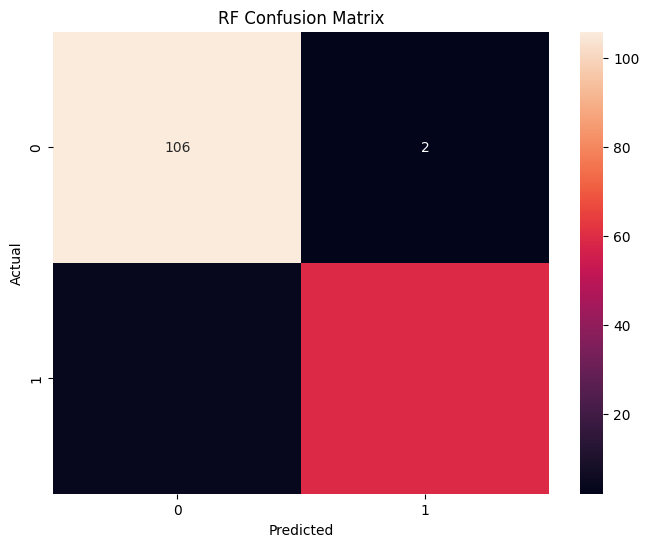

In [91]:
plot_confusion_matrix(random_forest,y_test, 'RF Confusion Matrix')

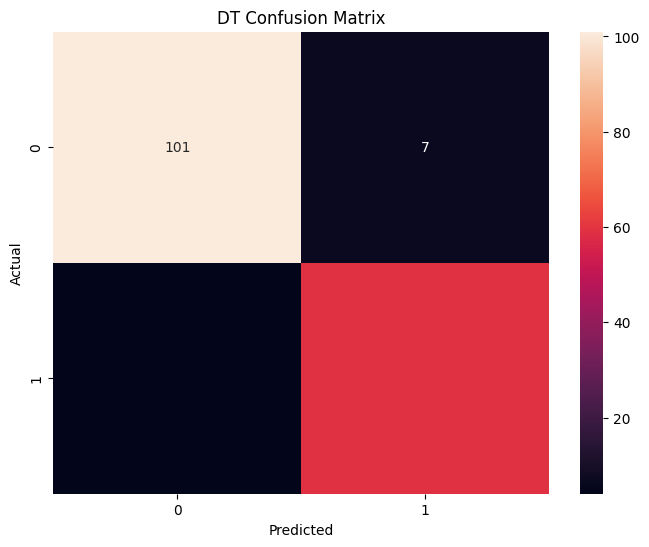

In [92]:
plot_confusion_matrix(decision_tree, y_test, 'DT Confusion Matrix')

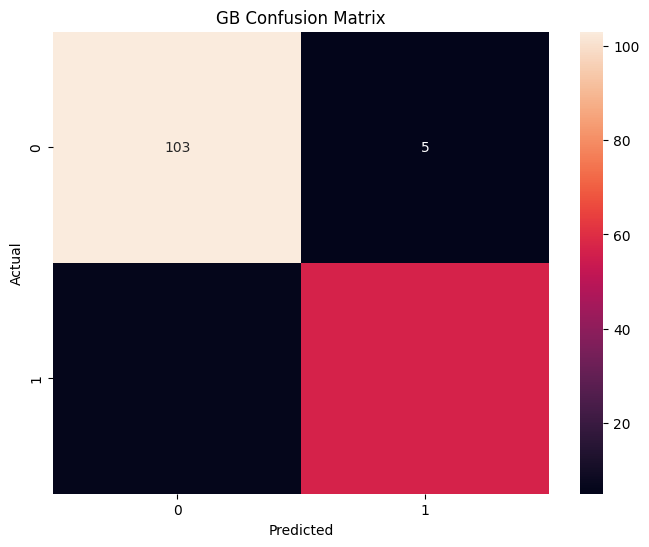

In [93]:
plot_confusion_matrix(gaussian_nb, y_test, 'GB Confusion Matrix')

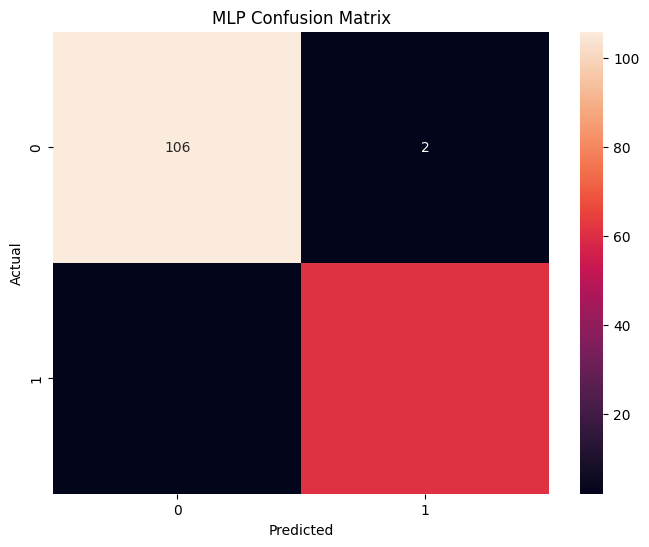

In [94]:
plot_confusion_matrix(mlp, y_test, 'MLP Confusion Matrix')